In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../data/boston.csv', sep=';')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
def plot_target(target):
    plt.title('Target distribution')

    median = target.median()
    q_min = target.quantile(0.025)
    q_max = target.quantile(1 - 0.025)

    plt.hist(target, bins=20)
    plt.vlines(median, ymin=0, ymax=80, color='r', label='Median')
    plt.vlines(q_min, ymin=0, ymax=80, color='g', label='Q 0.025')
    plt.vlines(q_max, ymin=0, ymax=80, color='g', label='Q 0.975')
    plt.legend()
    plt.show()

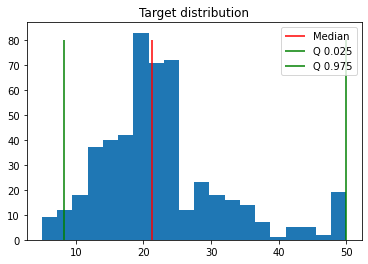

In [4]:
plot_target(data['target'])

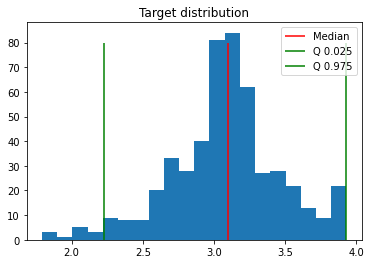

In [5]:
plot_target(data['target'].map(np.log1p))

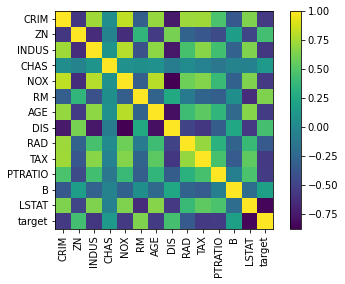

In [6]:
plt.imshow(data.corr(method='spearman'))
plt.xticks(range(data.shape[1]), data.columns.tolist(), rotation=90)
plt.yticks(range(data.shape[1]), data.columns.tolist(), rotation=0)
plt.colorbar()
plt.show()

In [7]:
def plot_features_borders(data):
    for column in data.columns:
        min_value = data[column].min()
        q_min = data[column].quantile(0.025)
        median = data[column].median()
        q_max = data[column].quantile(1 - 0.025)
        max_value = data[column].max()
        print(f'Feature: {column}')
        print(f'Min: {round(min_value, 2)},\t Q_min: {round(q_min, 2)},\t Median: {round(median, 2)},\t Q_max: {round(q_max, 2)},\t Max: {round(max_value, 2)}')

In [8]:
plot_features_borders(data)

Feature: CRIM
Min: 0.01,	 Q_min: 0.02,	 Median: 0.26,	 Q_max: 23.93,	 Max: 88.98
Feature: ZN
Min: 0.0,	 Q_min: 0.0,	 Median: 0.0,	 Q_max: 82.5,	 Max: 100.0
Feature: INDUS
Min: 0.46,	 Q_min: 1.52,	 Median: 9.69,	 Q_max: 21.89,	 Max: 27.74
Feature: CHAS
Min: 0.0,	 Q_min: 0.0,	 Median: 0.0,	 Q_max: 1.0,	 Max: 1.0
Feature: NOX
Min: 0.38,	 Q_min: 0.4,	 Median: 0.54,	 Q_max: 0.87,	 Max: 0.87
Feature: RM
Min: 3.56,	 Q_min: 4.97,	 Median: 6.21,	 Q_max: 7.97,	 Max: 8.78
Feature: AGE
Min: 2.9,	 Q_min: 9.96,	 Median: 77.5,	 Q_max: 100.0,	 Max: 100.0
Feature: DIS
Min: 1.13,	 Q_min: 1.36,	 Median: 3.21,	 Q_max: 8.79,	 Max: 12.13
Feature: RAD
Min: 1.0,	 Q_min: 1.0,	 Median: 5.0,	 Q_max: 24.0,	 Max: 24.0
Feature: TAX
Min: 187.0,	 Q_min: 193.0,	 Median: 330.0,	 Q_max: 666.0,	 Max: 711.0
Feature: PTRATIO
Min: 12.6,	 Q_min: 13.0,	 Median: 19.05,	 Q_max: 21.2,	 Max: 22.0
Feature: B
Min: 0.32,	 Q_min: 23.66,	 Median: 391.44,	 Q_max: 396.9,	 Max: 396.9
Feature: LSTAT
Min: 1.73,	 Q_min: 3.12,	 Median: 11.36

In [9]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

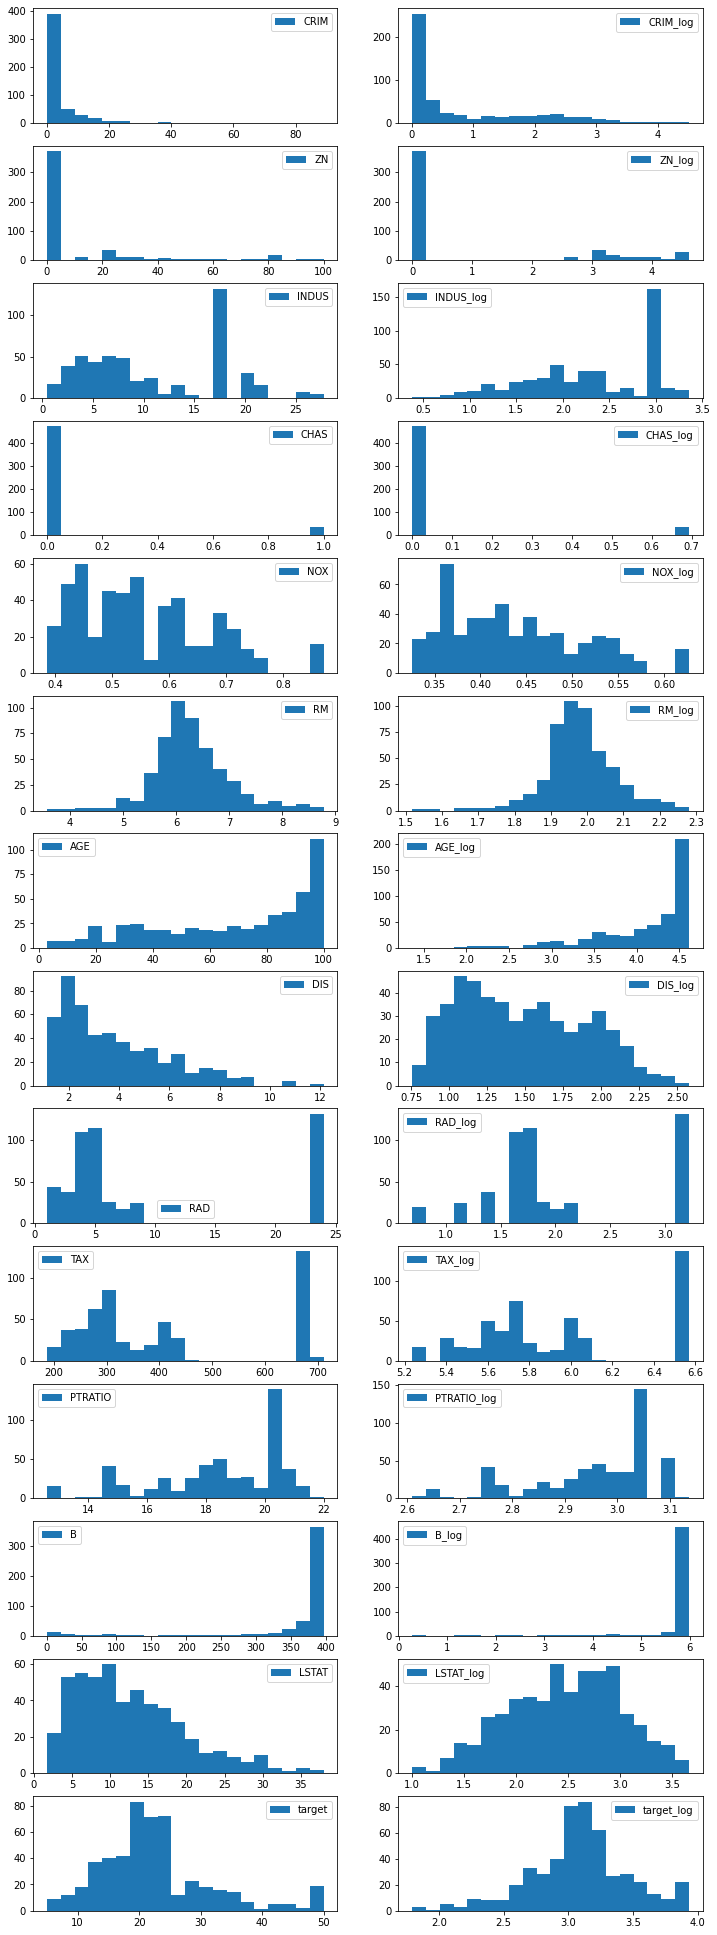

In [16]:
fig, axes = plt.subplots(data.shape[1], 2, figsize=(12, 2.5 * data.shape[1]))

for i, column in enumerate(data.columns):
    axes[i][0].hist(data[column], bins=20, label=column)
    axes[i][0].legend()
    axes[i][1].hist(data[column].map(np.log1p), bins=20, label=column + '_log')
    axes[i][1].legend()
plt.show()